# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [4]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#mnist = fetch_openml('mnist_784')
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [6]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [7]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [9]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

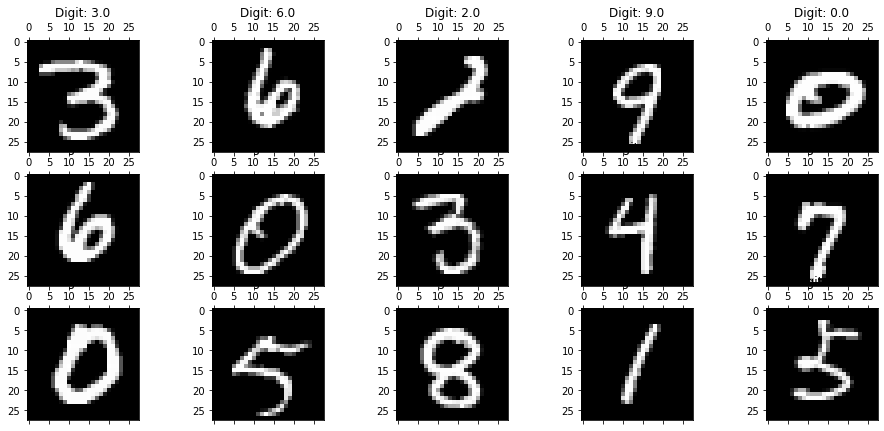

In [10]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (56000, 784)
X_test shape : (14000, 784)
y_train shape : (56000, 1)
y_test shape : (14000, 1)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [13]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)
X_pca 

array([[-5.77204739e+02,  1.65567715e+01,  4.07606201e+02, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
       [-4.69473894e+02,  6.12545244e+02, -3.56167264e+02, ...,
         2.96037778e-14,  2.07421101e-13, -9.60531423e-14],
       [-6.86730026e+02, -6.65122764e+01, -2.16282798e+02, ...,
         9.25427972e-14, -2.87800792e-13,  7.34007123e-14],
       ...,
       [-1.18449673e+02,  5.25810755e+02, -4.12119320e+02, ...,
        -3.53985919e-15,  1.24238893e-15, -2.36801854e-15],
       [ 1.72269740e+03, -6.12935358e+02,  5.78198893e+02, ...,
        -6.75549114e-15,  6.26119953e-16, -2.32320529e-15],
       [ 6.84332184e+01, -6.95630807e+01, -1.94701552e+02, ...,
        -4.04751266e-15,  2.36864302e-15, -2.72037391e-15]])

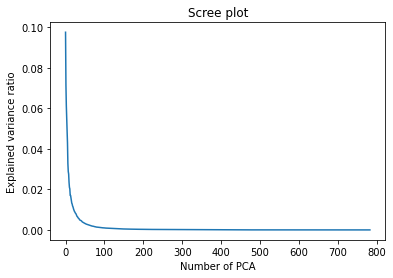

In [14]:
# screeplot
plt.title("Scree plot")
exp_var = pca.explained_variance_ratio_
plt.plot(range(len(exp_var)), pca.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

In [15]:
from kneed import KneeLocator
kn = KneeLocator(range(len(exp_var)), exp_var, curve = 'convex', direction = 'decreasing')  
print('Elbow Point:',kn.knee)

Elbow Point: 49


- PCA : 49개 

In [16]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

In [17]:
lda.explained_variance_ratio_  

array([0.23708117, 0.20328823, 0.17798282, 0.10633489, 0.09415639,
       0.06896763, 0.04990535, 0.03507761, 0.02720591])

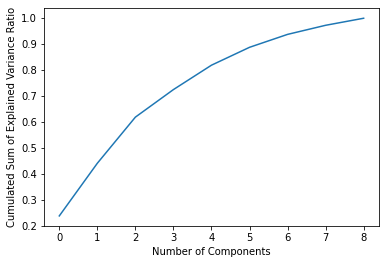

[0.23708117 0.4403694  0.61835223 0.72468711 0.8188435  0.88781114
 0.93771649 0.97279409 1.        ]


In [18]:
# 누적 설명 비율 그래프     
plt.plot(range(len(np.cumsum(lda.explained_variance_ratio_))), np.cumsum(lda.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulated Sum of Explained Variance Ratio")
plt.show()
print(np.cumsum(lda.explained_variance_ratio_  ) )

- LDA : 5개 ( 81.8% )

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import time 
from lightgbm import LGBMClassifier


Randomforest Classifier

In [17]:
#원본 데이터
start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
end = time.time()

rf_o = rf.predict(X_test)
print('Accuracy: ', accuracy_score(rf_o, y_test))
print('Time: ', end - start)

C:\Users\Kim Eun ho\AppData\Local\Temp\ipykernel_8972\10725560.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy:  0.9702857142857143
Time:  5972.217528581619


In [20]:
# PCA
pca = PCA(n_components = 49)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
end = time.time()

pred = rf.predict(X_test_pca)
print('Accuracy: ', accuracy_score(pred, y_test))
print('Time: ', end - start)

C:\Users\Kim Eun ho\AppData\Local\Temp\ipykernel_1120\81290508.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_pca, y_train)


Accuracy:  0.9527142857142857
Time:  100.57575273513794


In [21]:
# LDA
lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test) 

start = time.time()
rf = RandomForestClassifier()
rf.fit(X_train_lda, y_train)
end = time.time()

pred = rf.predict(X_test_lda)
print('Accuracy: ', accuracy_score(pred, y_test))
print('Time: ', end - start)

C:\Users\Kim Eun ho\AppData\Local\Temp\ipykernel_1120\3738337050.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_lda, y_train)


Accuracy:  0.8475714285714285
Time:  30.285809755325317


Logistic Regression

In [22]:
# 원본 데이터
start = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
end = time.time()

lr_o = lr.predict(X_test)
print('Accuracy: ', accuracy_score(lr_o, y_test))
print('Time: ', end - start)

C:\Users\Kim Eun ho\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9207142857142857
Time:  29.53279709815979


C:\Users\Kim Eun ho\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# PCA 
pca = PCA(n_components = 49)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start = time.time()
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
end = time.time()

pred = lr.predict(X_test_pca)
print('Accuracy: ', accuracy_score(pred, y_test))
print('Time: ', end - start)

C:\Users\Kim Eun ho\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9072857142857143
Time:  5.640179634094238


C:\Users\Kim Eun ho\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# LDA 

lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test) 

start = time.time()
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)
end = time.time()

pred = lr.predict(X_test_lda)
print('Accuracy: ', accuracy_score(pred, y_test))
print('Time: ', end - start)

C:\Users\Kim Eun ho\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8343571428571429
Time:  2.5614123344421387


- Accuracy : 원본데이터 > PCA 축소 데이터 > LDA 축소 데이터
- Time :  원본데이터 > PCA 축소 데이터 > LDA 축소 데이터
<br> 정확도는 원본데이터에 비해 PCA 축소 데이터는 미세하게 낮아지고 LDA 축소 데이터는 다소 떨어지나
그 속도는 현저히 빠른 것을 확인할 수 있다.

특정한 틀 없이 자유롭게 해주시면 됩니다!